# **Importation des bibliothèques nécessaires**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import joblib


# **Chargement des données**

In [21]:
file_path = '/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv'
df = pd.read_csv(file_path)

# **Exploration des données**

In [22]:
# Aperçu des 5 premières lignes
print("Aperçu des données :")
print(df.head())


Aperçu des données :
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Dis

In [7]:
# Résumé des informations sur le dataset
print("\nStructure des données :")
print(df.info())


Structure des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes               

In [8]:
# Supprimer la colonne 'DoctorInCharge' du DataFrame
df = df.drop(columns=['PatientID','DoctorInCharge'])

In [9]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())


Statistiques descriptives :
               Age       Gender    Ethnicity  EducationLevel          BMI  \
count  2149.000000  2149.000000  2149.000000     2149.000000  2149.000000   
mean     74.908795     0.506282     0.697534        1.286645    27.655697   
std       8.990221     0.500077     0.996128        0.904527     7.217438   
min      60.000000     0.000000     0.000000        0.000000    15.008851   
25%      67.000000     0.000000     0.000000        1.000000    21.611408   
50%      75.000000     1.000000     0.000000        1.000000    27.823924   
75%      83.000000     1.000000     1.000000        2.000000    33.869778   
max      90.000000     1.000000     3.000000        3.000000    39.992767   

           Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  \
count  2149.000000         2149.000000       2149.000000  2149.000000   
mean      0.288506           10.039442          4.920202     4.993138   
std       0.453173            5.757910          2.857191  

In [10]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


Valeurs manquantes par colonne :
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forge

# **Visualisation des données**

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>,
        <Axes: title={'center': 'EducationLevel'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoking'}>],
       [<Axes: title={'center': 'AlcoholConsumption'}>,
        <Axes: title={'center': 'PhysicalActivity'}>,
        <Axes: title={'center': 'DietQuality'}>,
        <Axes: title={'center': 'SleepQuality'}>,
        <Axes: title={'center': 'FamilyHistoryAlzheimers'}>,
        <Axes: title={'center': 'CardiovascularDisease'}>],
       [<Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Depression'}>,
        <Axes: title={'center': 'HeadInjury'}>,
        <Axes: title={'center': 'Hypertension'}>,
        <Axes: title={'center': 'SystolicBP'}>,
        <Axes: title={'center': 'DiastolicBP'}>],
       [<Axes: title={'center': 'CholesterolTotal'}>,
        <Axes: title={'center': 'CholesterolLDL'}>,
   

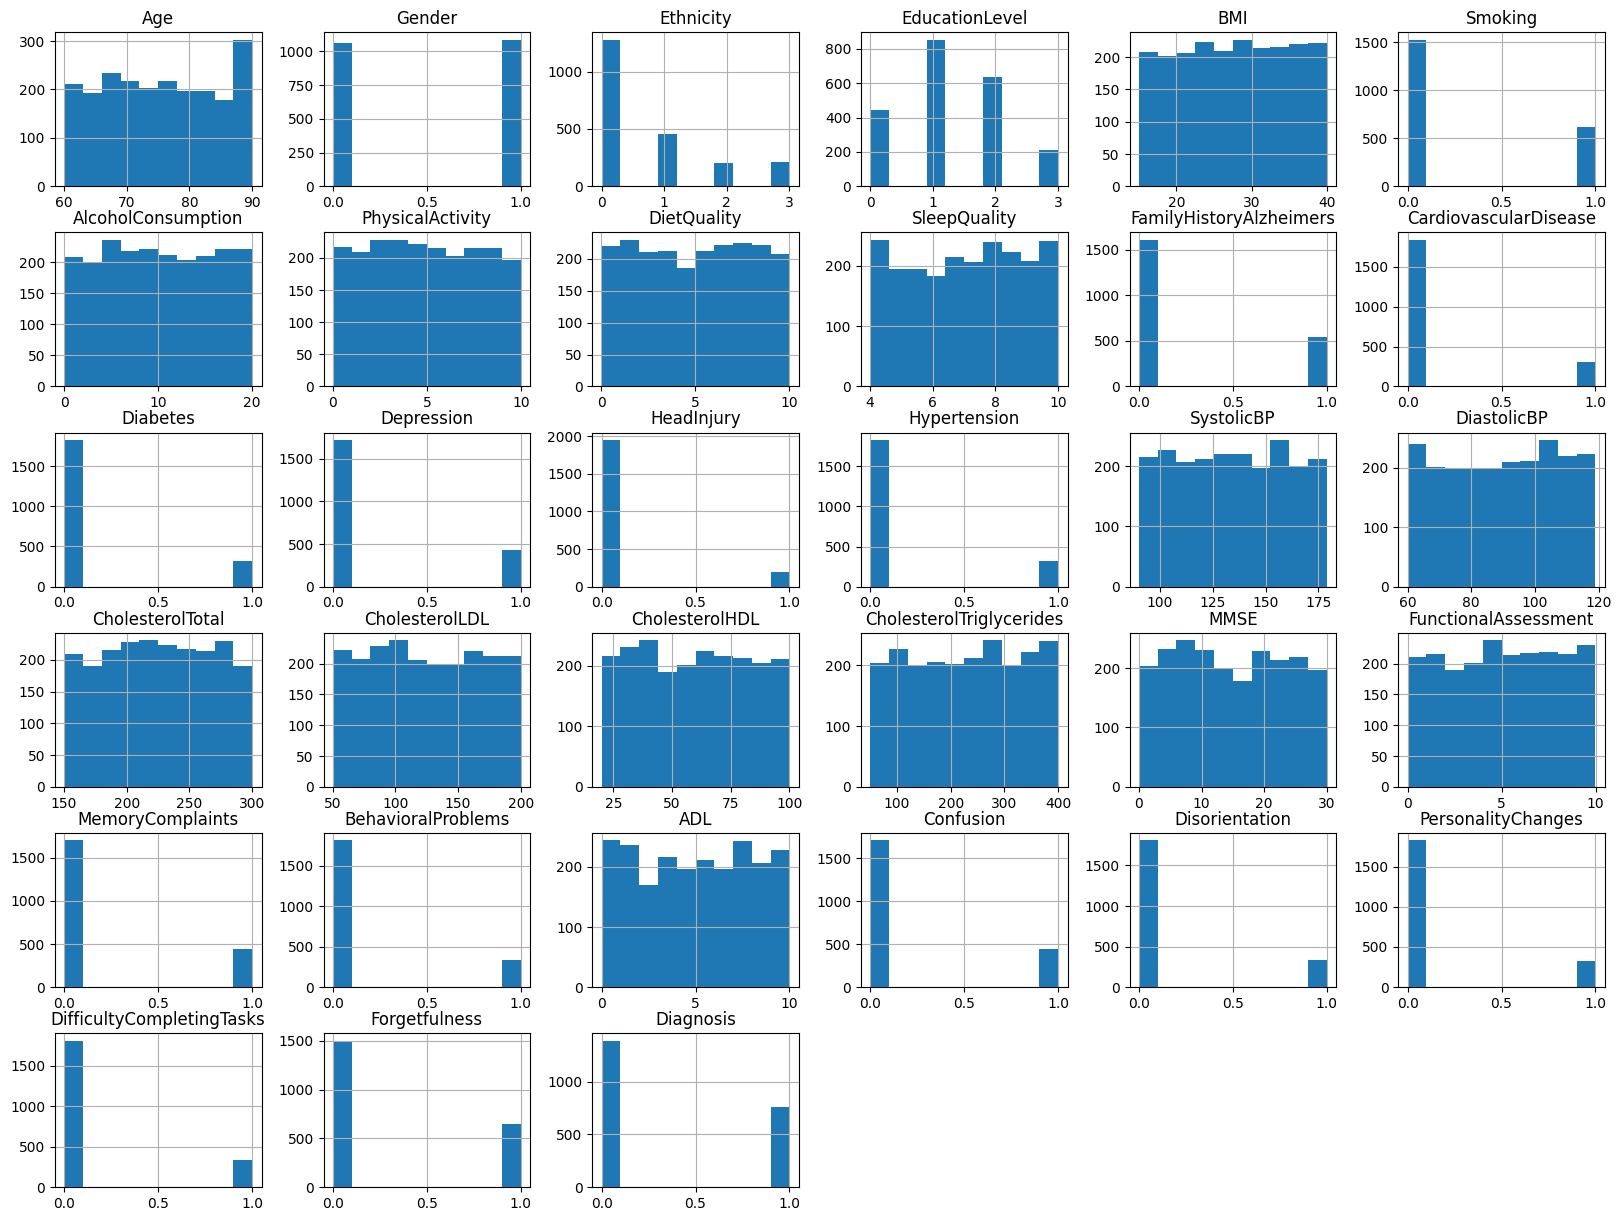

In [9]:
%matplotlib inline
df.hist(figsize=(20,15))

🌍 Détails Démographiques
Les visualisations démographiques offrent un aperçu de la répartition démographique de la maladie d'Alzheimer en fonction des groupes d'âge, des genres, des ethnies et des niveaux d'éducation.

Répartition par âge : Le graphique de répartition par âge montre le nombre de patients sous forme d'un histogramme. Les données indiquent que, à mesure que l'âge augmente, le nombre de diagnostics d'Alzheimer augmente généralement, avec un pic notable à l'âge de 90 ans.

Genre : Les taux de diagnostic sont assez similaires entre les femmes et les hommes, environ 35-36 % de chaque genre étant diagnostiqués.

Ethnie : Le taux de diagnostic le plus élevé est observé chez les patients asiatiques (39 %), tandis que le plus bas concerne les patients afro-américains (31 %).

Niveau d'éducation : Les patients sans éducation formelle présentent le taux le plus élevé de maladie d'Alzheimer (40 %), tandis que ceux ayant un niveau d'éducation élevé présentent le taux le plus bas (31 %).

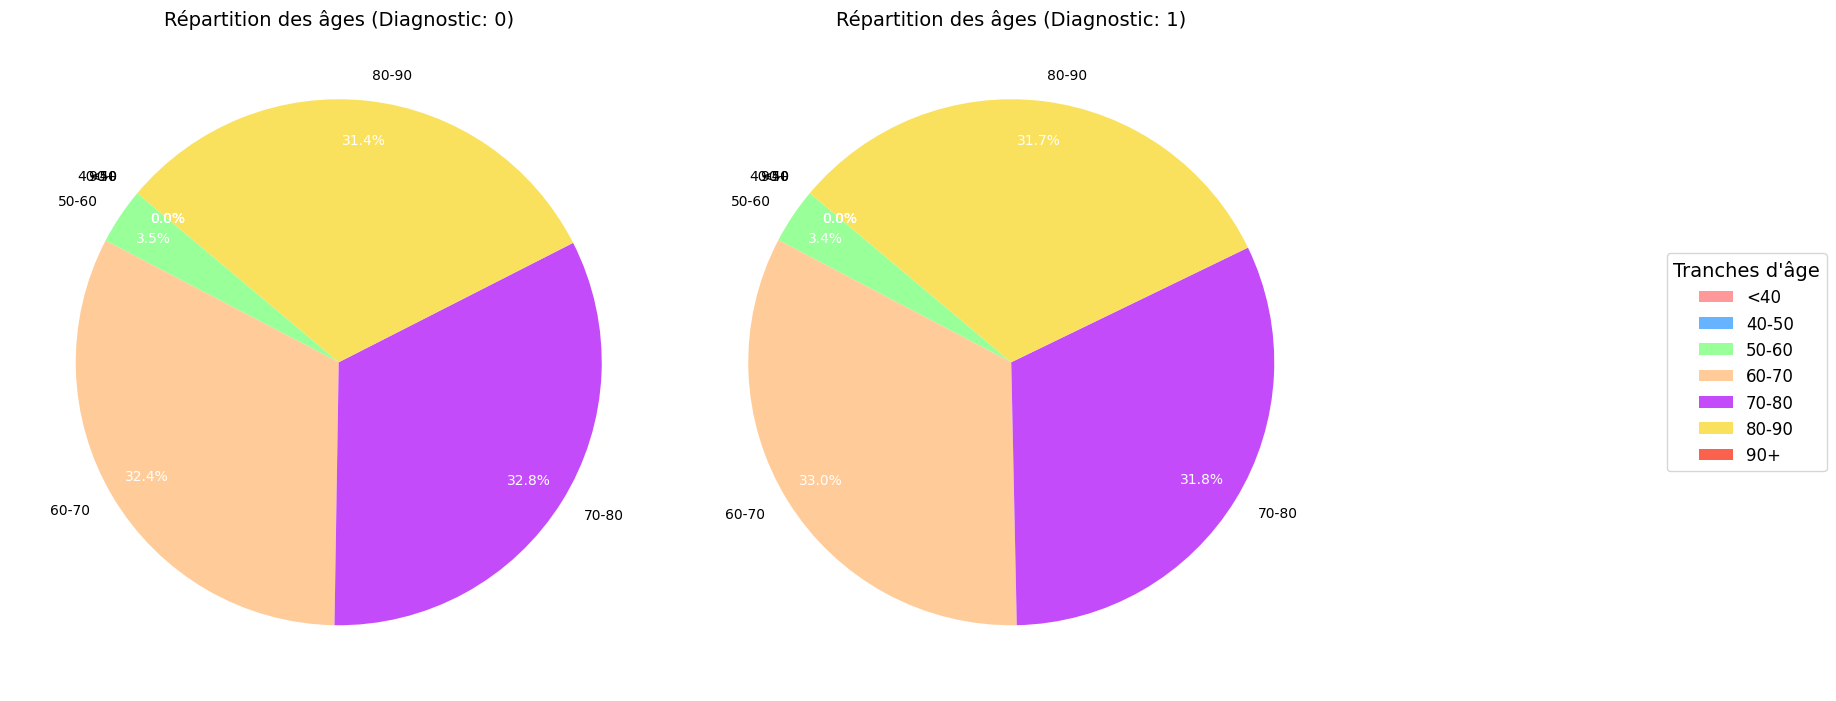

In [10]:
# Séparer les données en fonction de la colonne Diagnosis
diagnosis_0 = df[df['Diagnosis'] == 0]['Age']
diagnosis_1 = df[df['Diagnosis'] == 1]['Age']

# Définir les tranches d'âge
bins = [0, 40, 50, 60, 70, 80, 90, 100]
labels = ['<40', '40-50', '50-60', '60-70', '70-80', '80-90', '90+']

# Grouper les âges par tranches
age_groups_0 = pd.cut(diagnosis_0, bins=bins, labels=labels).value_counts(sort=False)
age_groups_1 = pd.cut(diagnosis_1, bins=bins, labels=labels).value_counts(sort=False)

# Couleurs vives pour les graphiques
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c44bfa', '#fae15d', '#fa624d']

# Créer les graphiques circulaires
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart pour Diagnosis 0
wedges_0, texts_0, autotexts_0 = axes[0].pie(
    age_groups_0, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85
)
axes[0].set_title('Répartition des âges (Diagnostic: 0)', fontsize=14)
for autotext in autotexts_0:
    autotext.set_color('white')  # Texte en blanc pour contraster

# Pie chart pour Diagnosis 1
wedges_1, texts_1, autotexts_1 = axes[1].pie(
    age_groups_1, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85
)
axes[1].set_title('Répartition des âges (Diagnostic: 1)', fontsize=14)
for autotext in autotexts_1:
    autotext.set_color('white')  # Texte en blanc pour contraster

# Légende commune, placée verticalement
fig.legend(
    labels, loc="center right", title="Tranches d'âge", fontsize=12, title_fontsize=14, bbox_to_anchor=(1.15, 0.5)
)

# Ajuster les marges
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Réduire la largeur pour la légende verticale
plt.show()

In [11]:
# Function to add labels above the bars
def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container)

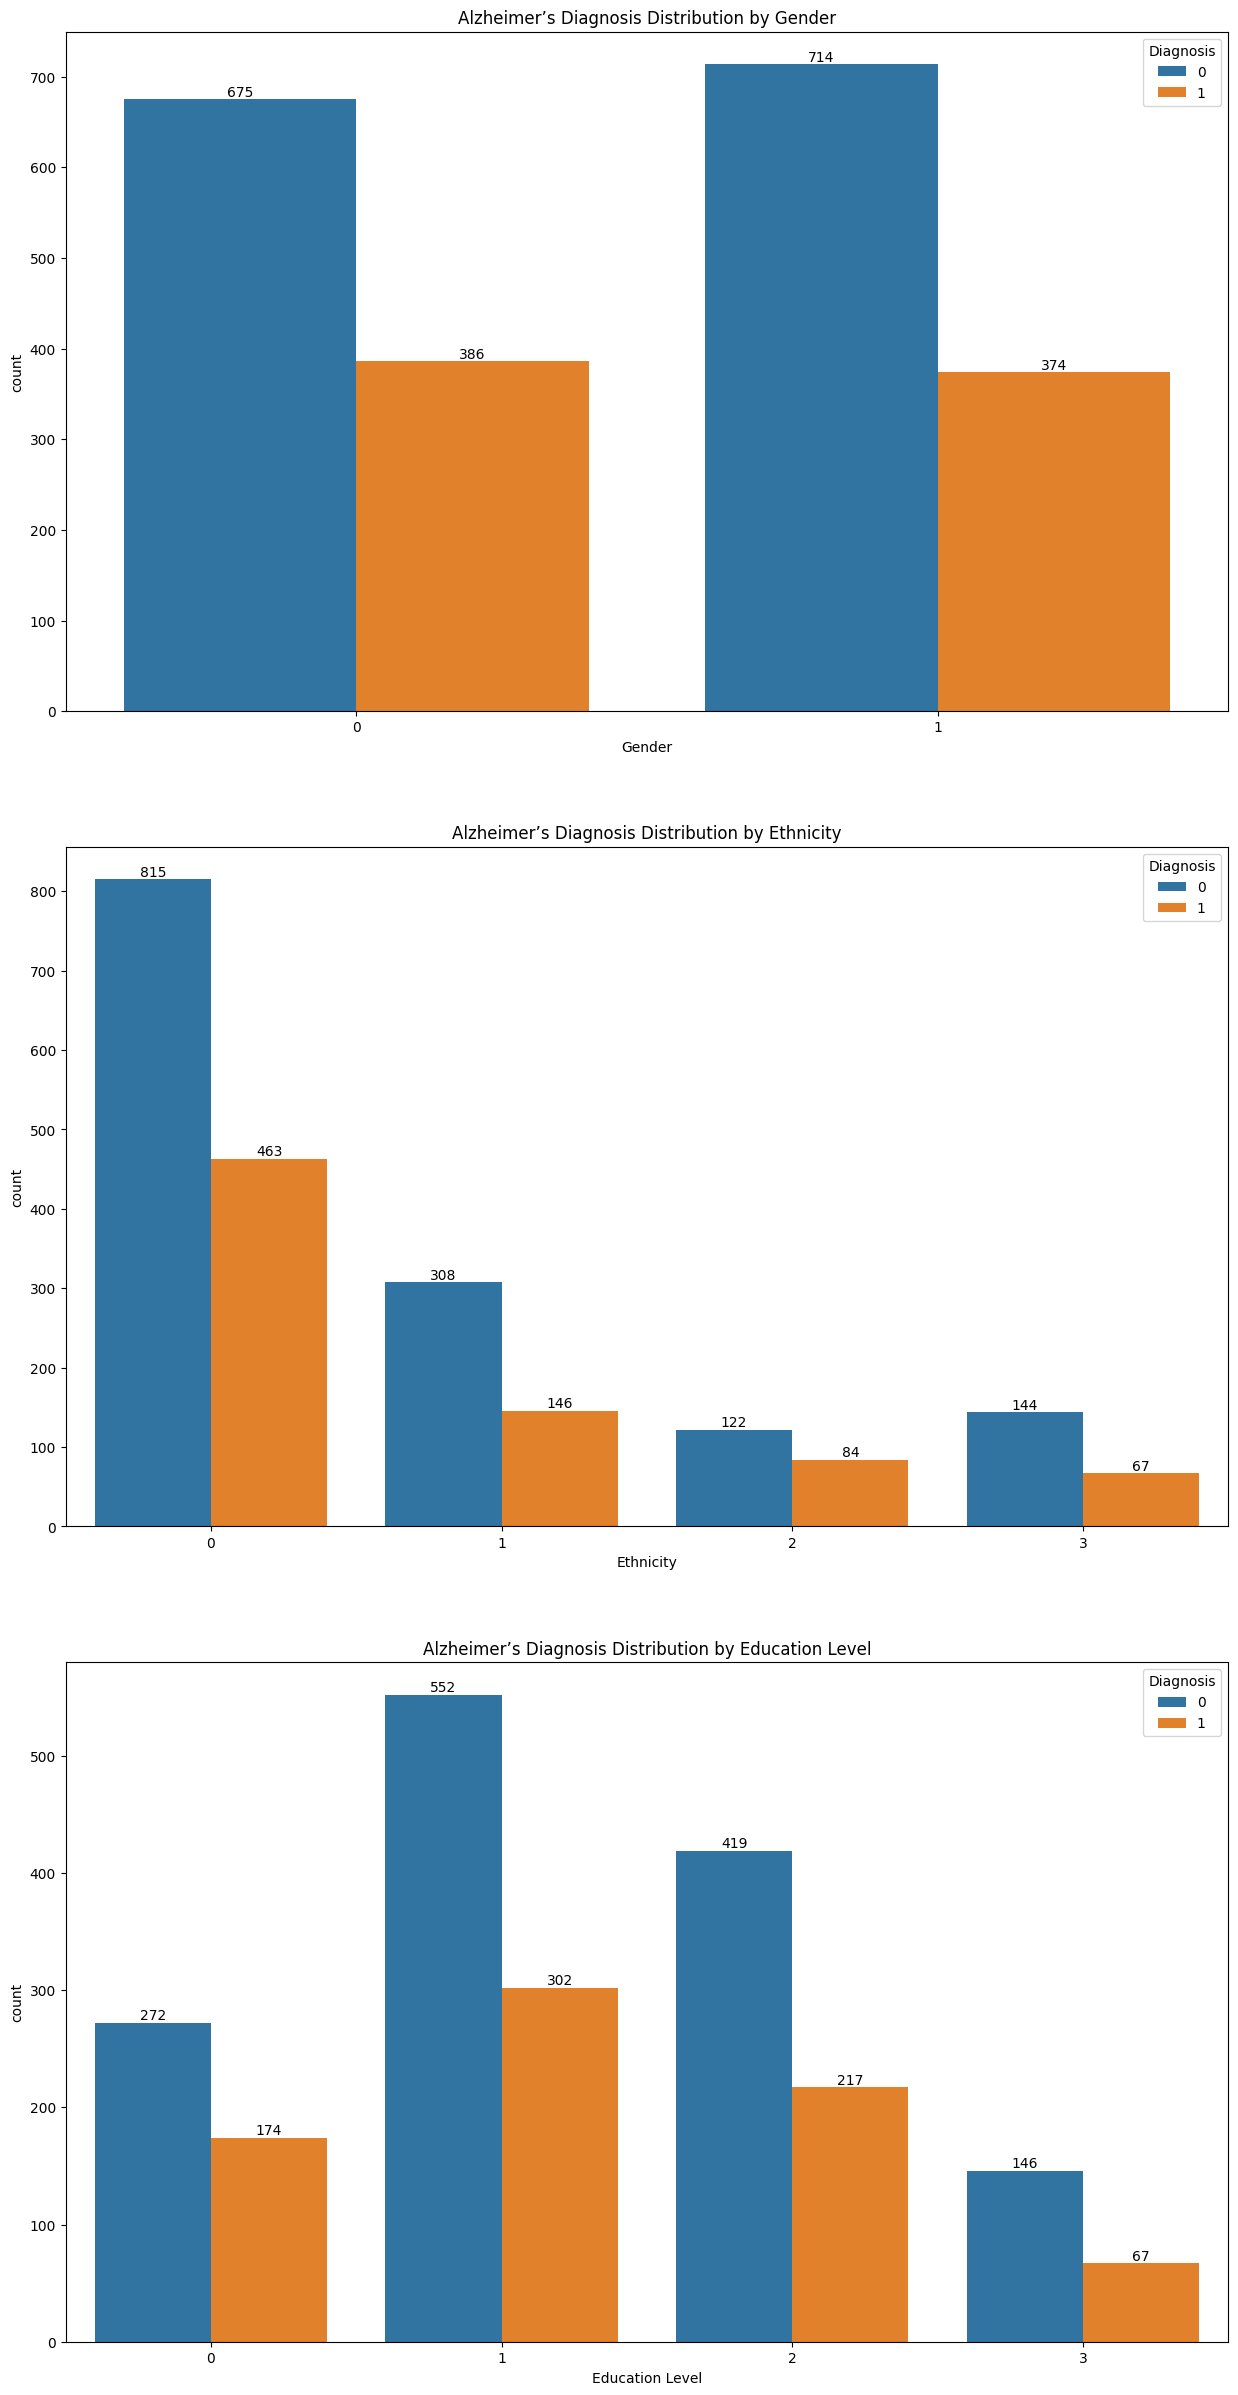

In [13]:
# Setting figure
fig, axes = plt.subplots(3, 1, figsize = (15, 30))

# List of tuples containing plot types, column names, x-labels, and titles
plots_info = [
    (sns.countplot, "Gender", "Gender", "Alzheimer’s Diagnosis Distribution by Gender"),
    (sns.countplot, "Ethnicity", "Ethnicity", "Alzheimer’s Diagnosis Distribution by Ethnicity"),
    (sns.countplot, "EducationLevel", "Education Level", "Alzheimer’s Diagnosis Distribution by Education Level")
]

# Loop to create plots
for ax, (plot_func, column, xlabel, title) in zip(axes, plots_info):
    plot_func(data = df, x = column, hue = "Diagnosis", ax = ax)
    if plot_func == sns.countplot:
        add_labels(ax)
    ax.set_xlabel(xlabel)
    ax.set_title(title)  

🌱 Facteurs de Style de Vie
Les visualisations sur le style de vie donnent un aperçu de la répartition de la maladie d'Alzheimer en fonction de divers facteurs de style de vie, notamment l'IMC, le tabagisme, la consommation d'alcool, l'activité physique, la qualité de l'alimentation et la qualité du sommeil.

Répartition de l'IMC : Le graphique de densité suggère que les patients ayant un IMC plus élevé sont moins susceptibles de souffrir d'Alzheimer. La plupart des patients sans la maladie ont un IMC compris entre 20 et 30, tandis que ceux atteints d'Alzheimer tendent à avoir un IMC légèrement inférieur.

Tabagisme : Le graphique en barres montre qu'environ 35 % des fumeurs et 36 % des non-fumeurs sont diagnostiqués avec Alzheimer, les non-fumeurs ayant un taux de diagnostic légèrement plus élevé.

Consommation d'alcool : Le graphique de densité révèle que les patients sans Alzheimer consomment généralement plus d'alcool, avec une consommation maximale entre 5 et 15 unités, tandis que ceux atteints d'Alzheimer ont tendance à boire moins.

Activité physique : Le graphique de l'activité physique indique que les patients sans Alzheimer pratiquent davantage d'activité physique, avec un pic autour de 4 à 7 heures par semaine, tandis que ceux atteints d'Alzheimer sont moins actifs, avec un pic autour de 2 à 4 heures par semaine.

Qualité de l’alimentation : Le graphique montre que les patients sans Alzheimer obtiennent généralement un score de qualité alimentaire plus élevé que ceux atteints de la maladie.

Qualité du sommeil : Les patients atteints d'Alzheimer ont tendance à avoir une qualité de sommeil plus faible, leurs scores atteignant un pic dans une plage inférieure, tandis que les patients sans Alzheimer atteignent un pic de qualité de sommeil entre 7 et 9.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

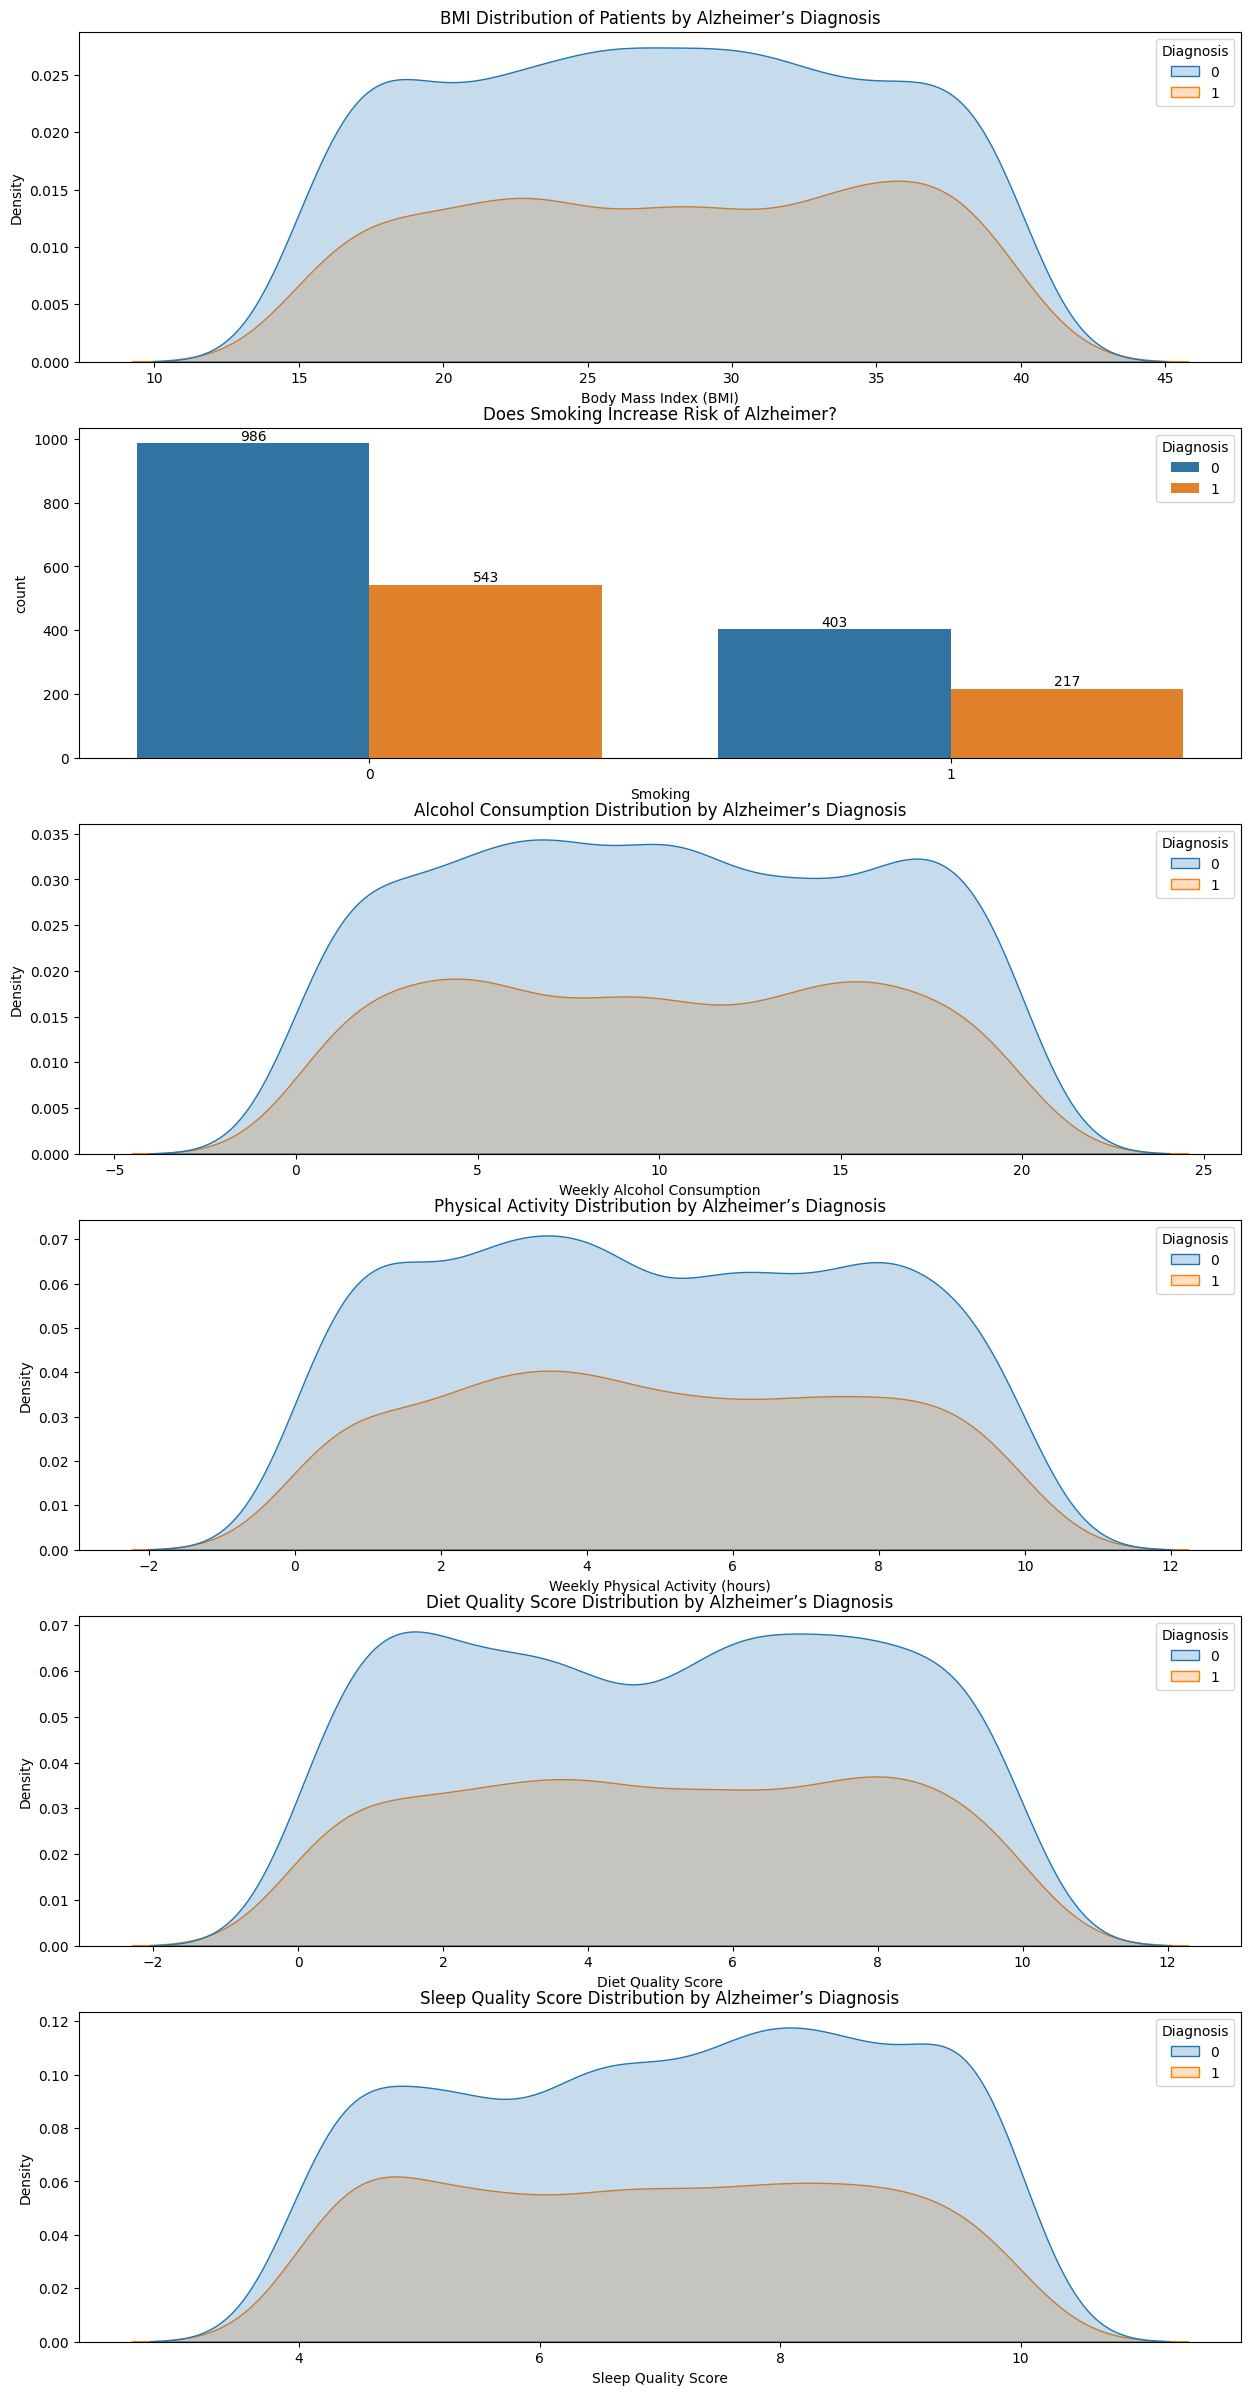

In [14]:
# Setting figure
fig, axes = plt.subplots(6, 1, figsize = (15, 30))

# List of tuples containing plot types, column names, x-labels, and titles
plots_info = [
    (sns.kdeplot, "BMI", "Body Mass Index (BMI)", "BMI Distribution of Patients by Alzheimer’s Diagnosis"),
    (sns.countplot, "Smoking", "Smoking", "Does Smoking Increase Risk of Alzheimer?"),
    (sns.kdeplot, "AlcoholConsumption", "Weekly Alcohol Consumption", "Alcohol Consumption Distribution by Alzheimer’s Diagnosis"),
    (sns.kdeplot, "PhysicalActivity", "Weekly Physical Activity (hours)", "Physical Activity Distribution by Alzheimer’s Diagnosis"),
    (sns.kdeplot, "DietQuality", "Diet Quality Score", "Diet Quality Score Distribution by Alzheimer’s Diagnosis"),
    (sns.kdeplot, "SleepQuality", "Sleep Quality Score", "Sleep Quality Score Distribution by Alzheimer’s Diagnosis")
]

# Loop to create plots
for ax, (plot_func, column, xlabel, title) in zip(axes, plots_info):
    if plot_func == sns.kdeplot:
        plot_func(data = df, x = column, hue = "Diagnosis", fill = True, ax = ax)
    else:
        plot_func(data = df, x = column, hue = "Diagnosis", ax = ax)
        add_labels(ax)
    ax.set_xlabel(xlabel)
    ax.set_title(title)


👨‍⚕️ Antécédents Médicaux
Les antécédents médicaux montrent la relation entre différents facteurs médicaux et le diagnostic de la maladie d'Alzheimer. Voici une description de chaque graphique :

Antécédents familiaux : Avoir des antécédents familiaux de maladie d'Alzheimer semble être associé à un pourcentage légèrement inférieur de diagnostics, bien que la différence ne soit pas significative.

Maladie cardiovasculaire : La présence d'une maladie cardiovasculaire est associée à un pourcentage légèrement plus élevé de diagnostics de la maladie d'Alzheimer.

Diabète : La présence de diabète ne semble pas avoir d'impact significatif sur les taux de diagnostic d'Alzheimer par rapport aux personnes sans diabète.

Dépression : La présence de dépression est associée à un pourcentage légèrement plus élevé de diagnostics d'Alzheimer, bien que la différence soit mineure.

Blessure à la tête : Un historique de blessure à la tête est associé à un pourcentage légèrement inférieur de diagnostics d'Alzheimer.

Hypertension : L'hypertension est liée à un taux de diagnostic légèrement plus élevé de 38,2 % par rapport à 34,8 % chez les personnes sans hypertension.

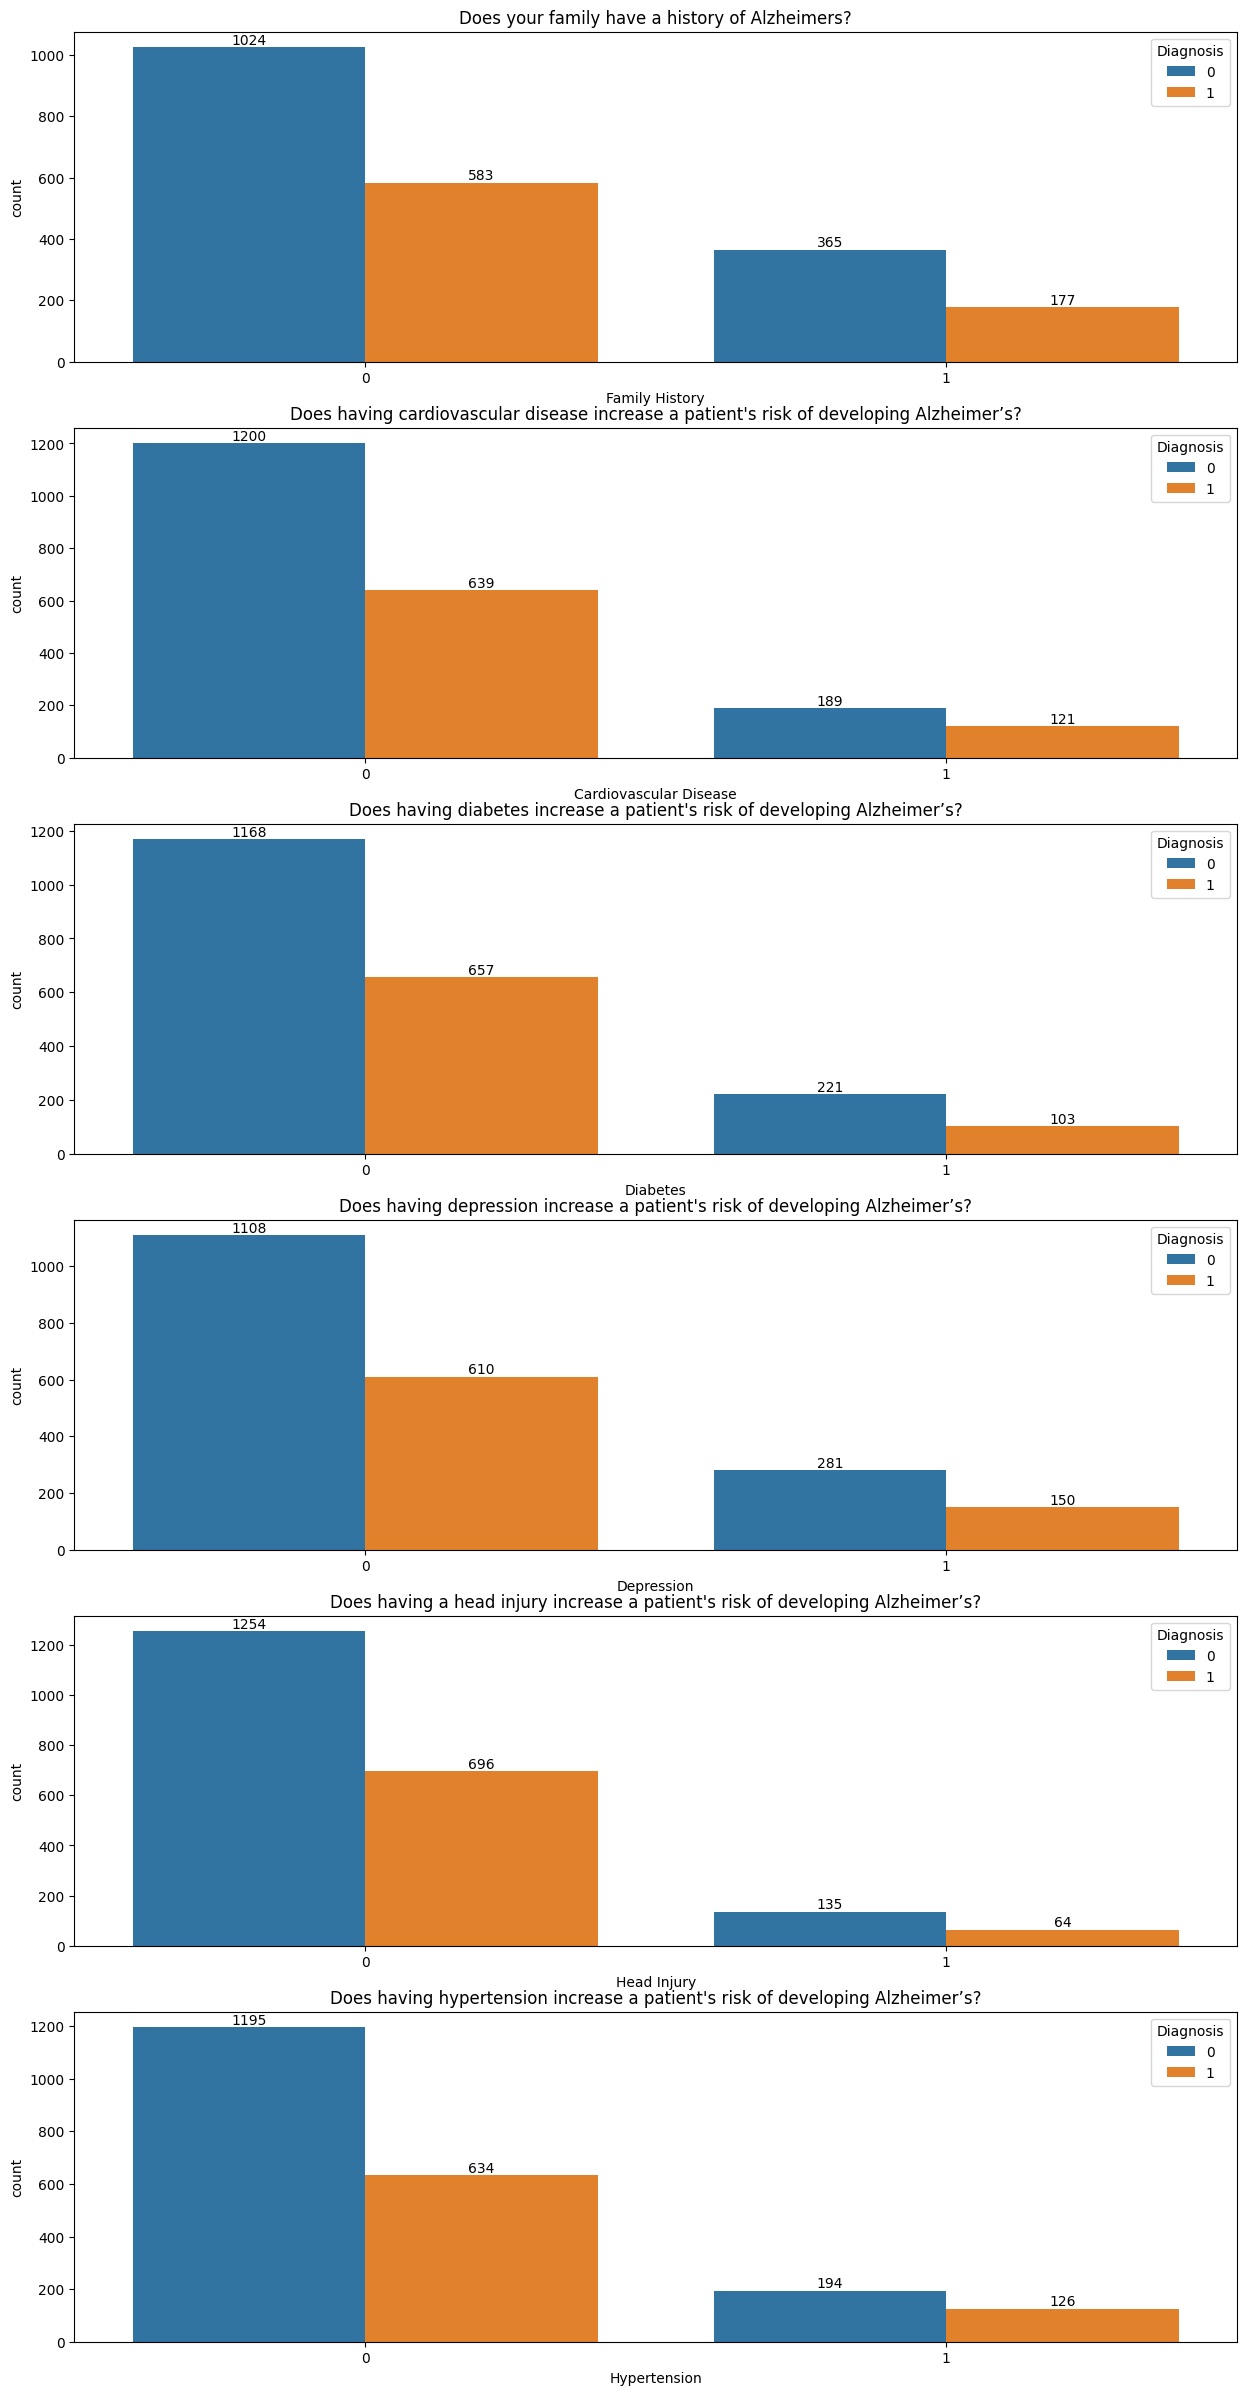

In [15]:
# Setting figure
fig, axes = plt.subplots(6, 1, figsize = (15, 30))

# List of tuples containing column names, x-labels, and titles
plots_info = [
    ("FamilyHistoryAlzheimers", "Family History", "Does your family have a history of Alzheimers?"),
    ("CardiovascularDisease", "Cardiovascular Disease", "Does having cardiovascular disease increase a patient's risk of developing Alzheimer’s?"),
    ("Diabetes", "Diabetes", "Does having diabetes increase a patient's risk of developing Alzheimer’s?"),
    ("Depression", "Depression", "Does having depression increase a patient's risk of developing Alzheimer’s?"),
    ("HeadInjury", "Head Injury", "Does having a head injury increase a patient's risk of developing Alzheimer’s?"),
    ("Hypertension", "Hypertension", "Does having hypertension increase a patient's risk of developing Alzheimer’s?")
]

# Loop to create plots
for ax, (column, xlabel, title) in zip(axes, plots_info):
    sns.countplot(data = df, x = column, hue = "Diagnosis", ax = ax)
    add_labels(ax)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

🧠 Évaluations Cognitives et Fonctionnelles
Les évaluations cognitives et fonctionnelles, incluant le MMSE, l'évaluation fonctionnelle, les plaintes liées à la mémoire, les problèmes comportementaux et le score des activités de la vie quotidienne (ADL), révèlent des corrélations importantes avec la maladie d'Alzheimer, en particulier pour les symptômes comme les plaintes de mémoire et les problèmes comportementaux.

Examen Cognitif Global (MMSE) : Le score MMSE varie de 0 (sévère) à 30 (non sévère). La répartition montre que les scores faibles, en particulier entre 0 et 15, sont associés à une probabilité plus élevée d'Alzheimer. Les scores entre 15 et 25 indiquent une probabilité approximativement égale, tandis que les scores supérieurs à 25 correspondent à un risque beaucoup plus faible de développer la maladie.

Évaluation Fonctionnelle : Le score d'évaluation fonctionnelle varie de 0 (sévère) à 10 (non sévère). La distribution montre que les scores compris entre 0 et 5 sont associés à une probabilité plus élevée de diagnostic d'Alzheimer, tandis que les scores supérieurs à 5 réduisent cette probabilité.

Plaintes de Mémoire et Problèmes Comportementaux : Ces deux aspects montrent directement que les patients ayant des plaintes de mémoire ou des problèmes comportementaux sont plus susceptibles de recevoir un diagnostic d'Alzheimer.

Score des Activités de la Vie Quotidienne (ADL) : Le score ADL varie de 0 (sévère) à 10 (non sévère). La distribution indique que les scores faibles, entre 0 et 5, augmentent la probabilité de développer Alzheimer, tandis que des scores plus élevés réduisent cette probabilité.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

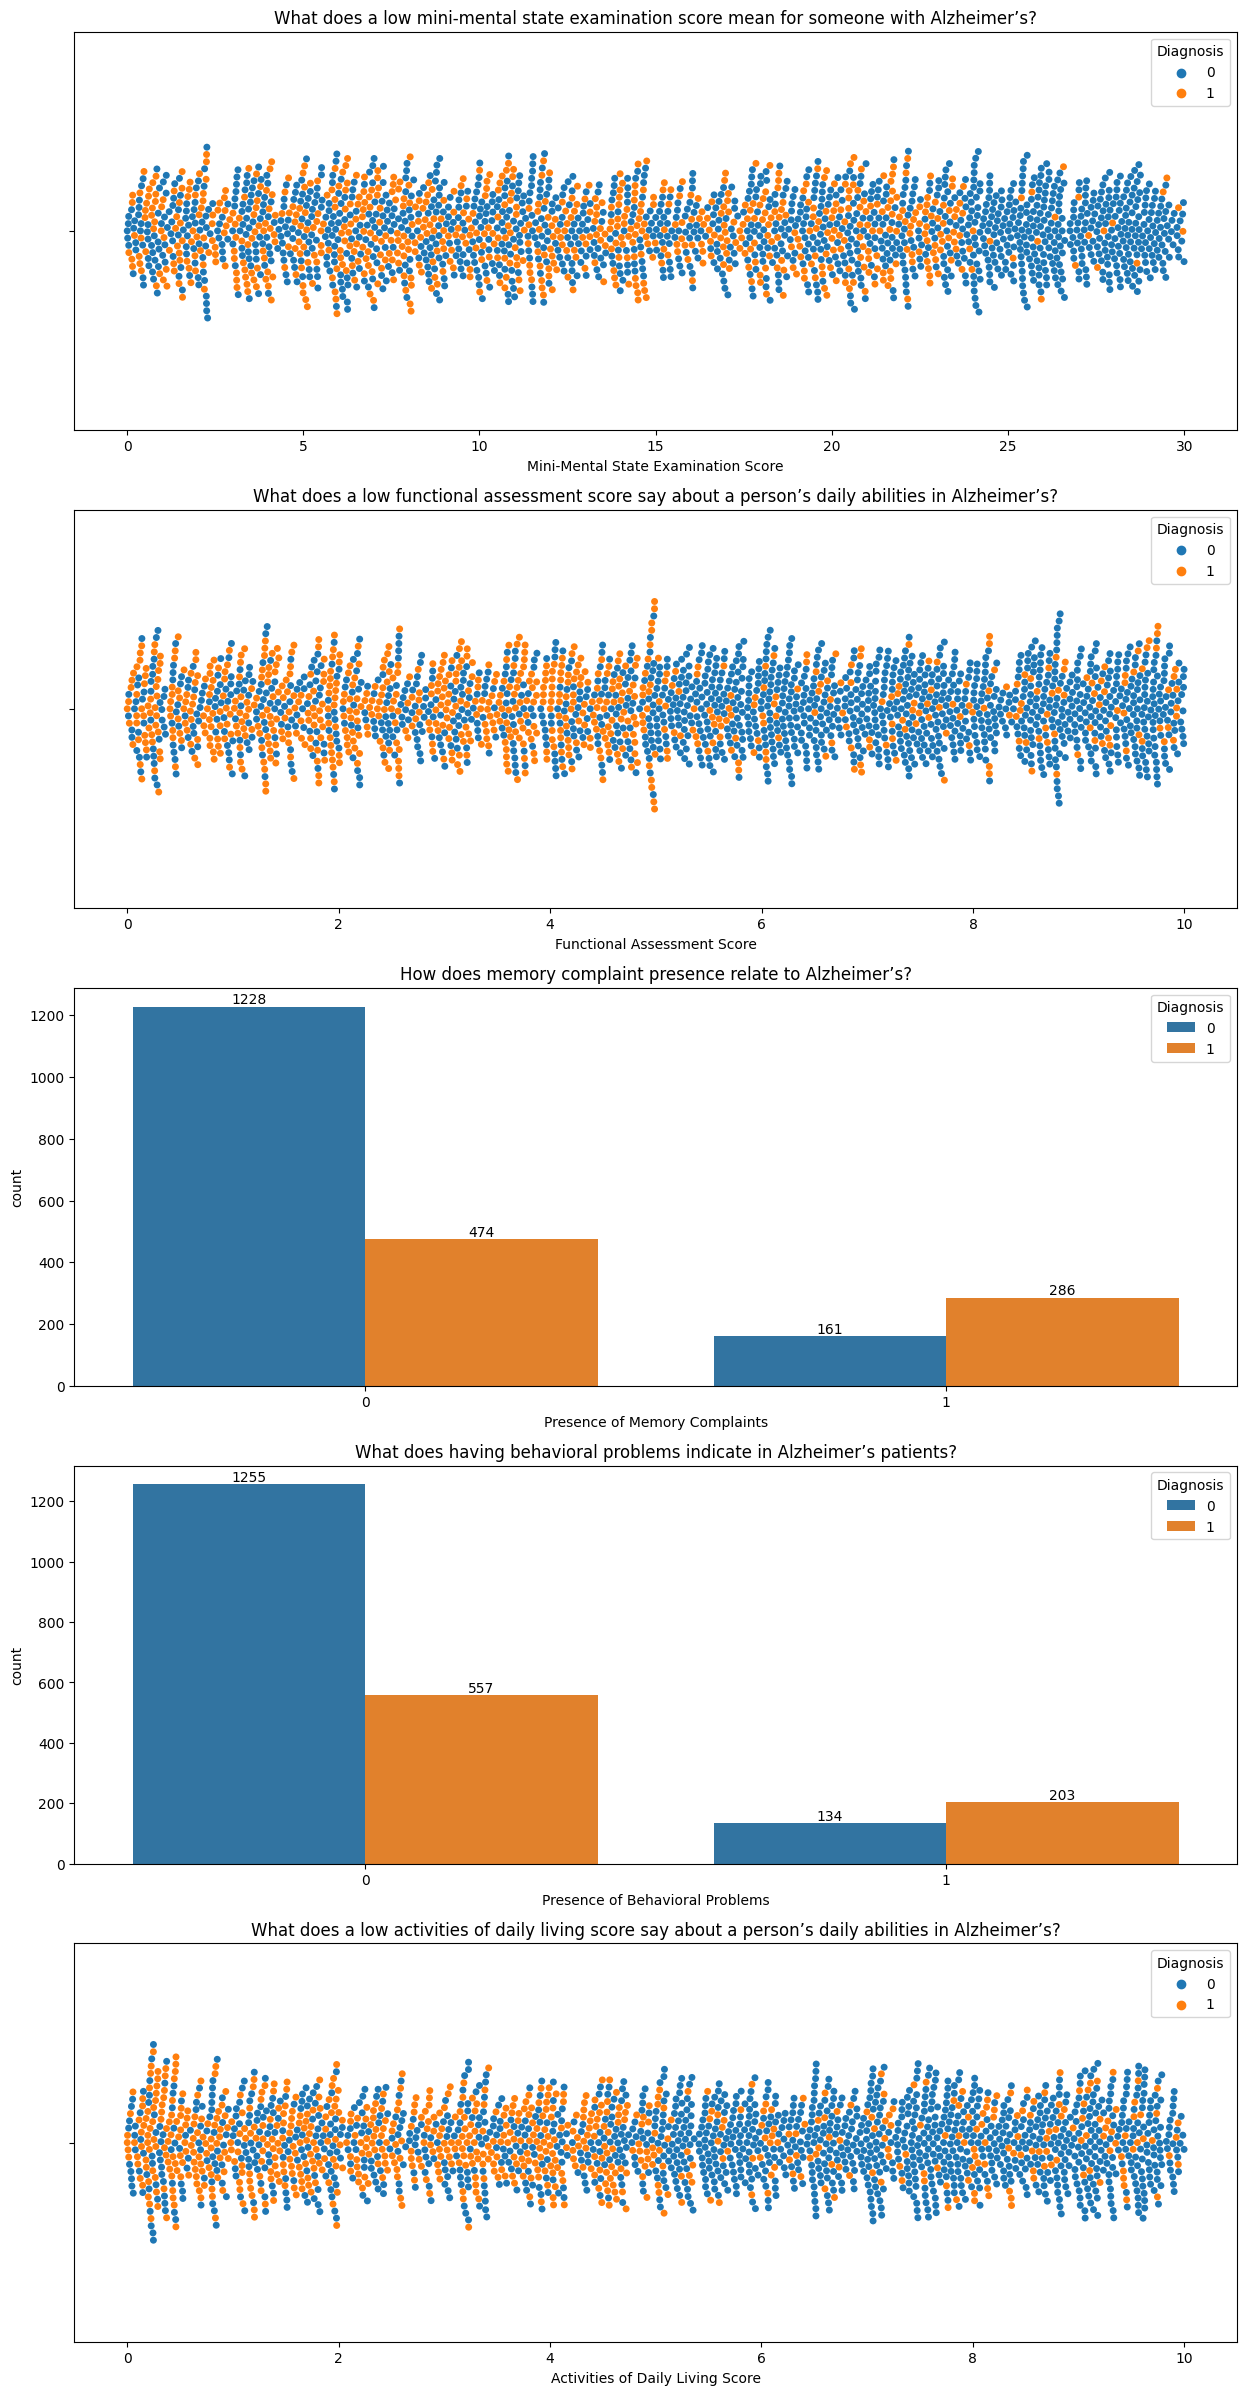

In [16]:
# Setting figure
fig, axes = plt.subplots(5, 1, figsize = (15, 30))

# List of tuples containing the plot type, column names, x-labels, and titles
plots_info = [
    (sns.swarmplot, "MMSE", "Mini-Mental State Examination Score", "What does a low mini-mental state examination score mean for someone with Alzheimer’s?"),
    (sns.swarmplot, "FunctionalAssessment", "Functional Assessment Score", "What does a low functional assessment score say about a person’s daily abilities in Alzheimer’s?"),
    (sns.countplot, "MemoryComplaints", "Presence of Memory Complaints", "How does memory complaint presence relate to Alzheimer’s?"),
    (sns.countplot, "BehavioralProblems", "Presence of Behavioral Problems", "What does having behavioral problems indicate in Alzheimer’s patients?"),
    (sns.swarmplot, "ADL", "Activities of Daily Living Score", "What does a low activities of daily living score say about a person’s daily abilities in Alzheimer’s?")
]

# Loop to create plots
for ax, (plot_func, column, xlabel, title) in zip(axes, plots_info):
    plot_func(data = df, x = column, hue = "Diagnosis", ax = ax)
    if plot_func == sns.countplot:
        add_labels(ax)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

🤕 Symptômes
Parmi tous les symptômes, il existe une association modérée avec la maladie d'Alzheimer. L'oubli présente un lien plus fort, avec un pourcentage plus élevé de diagnostics parmi les personnes atteintes.

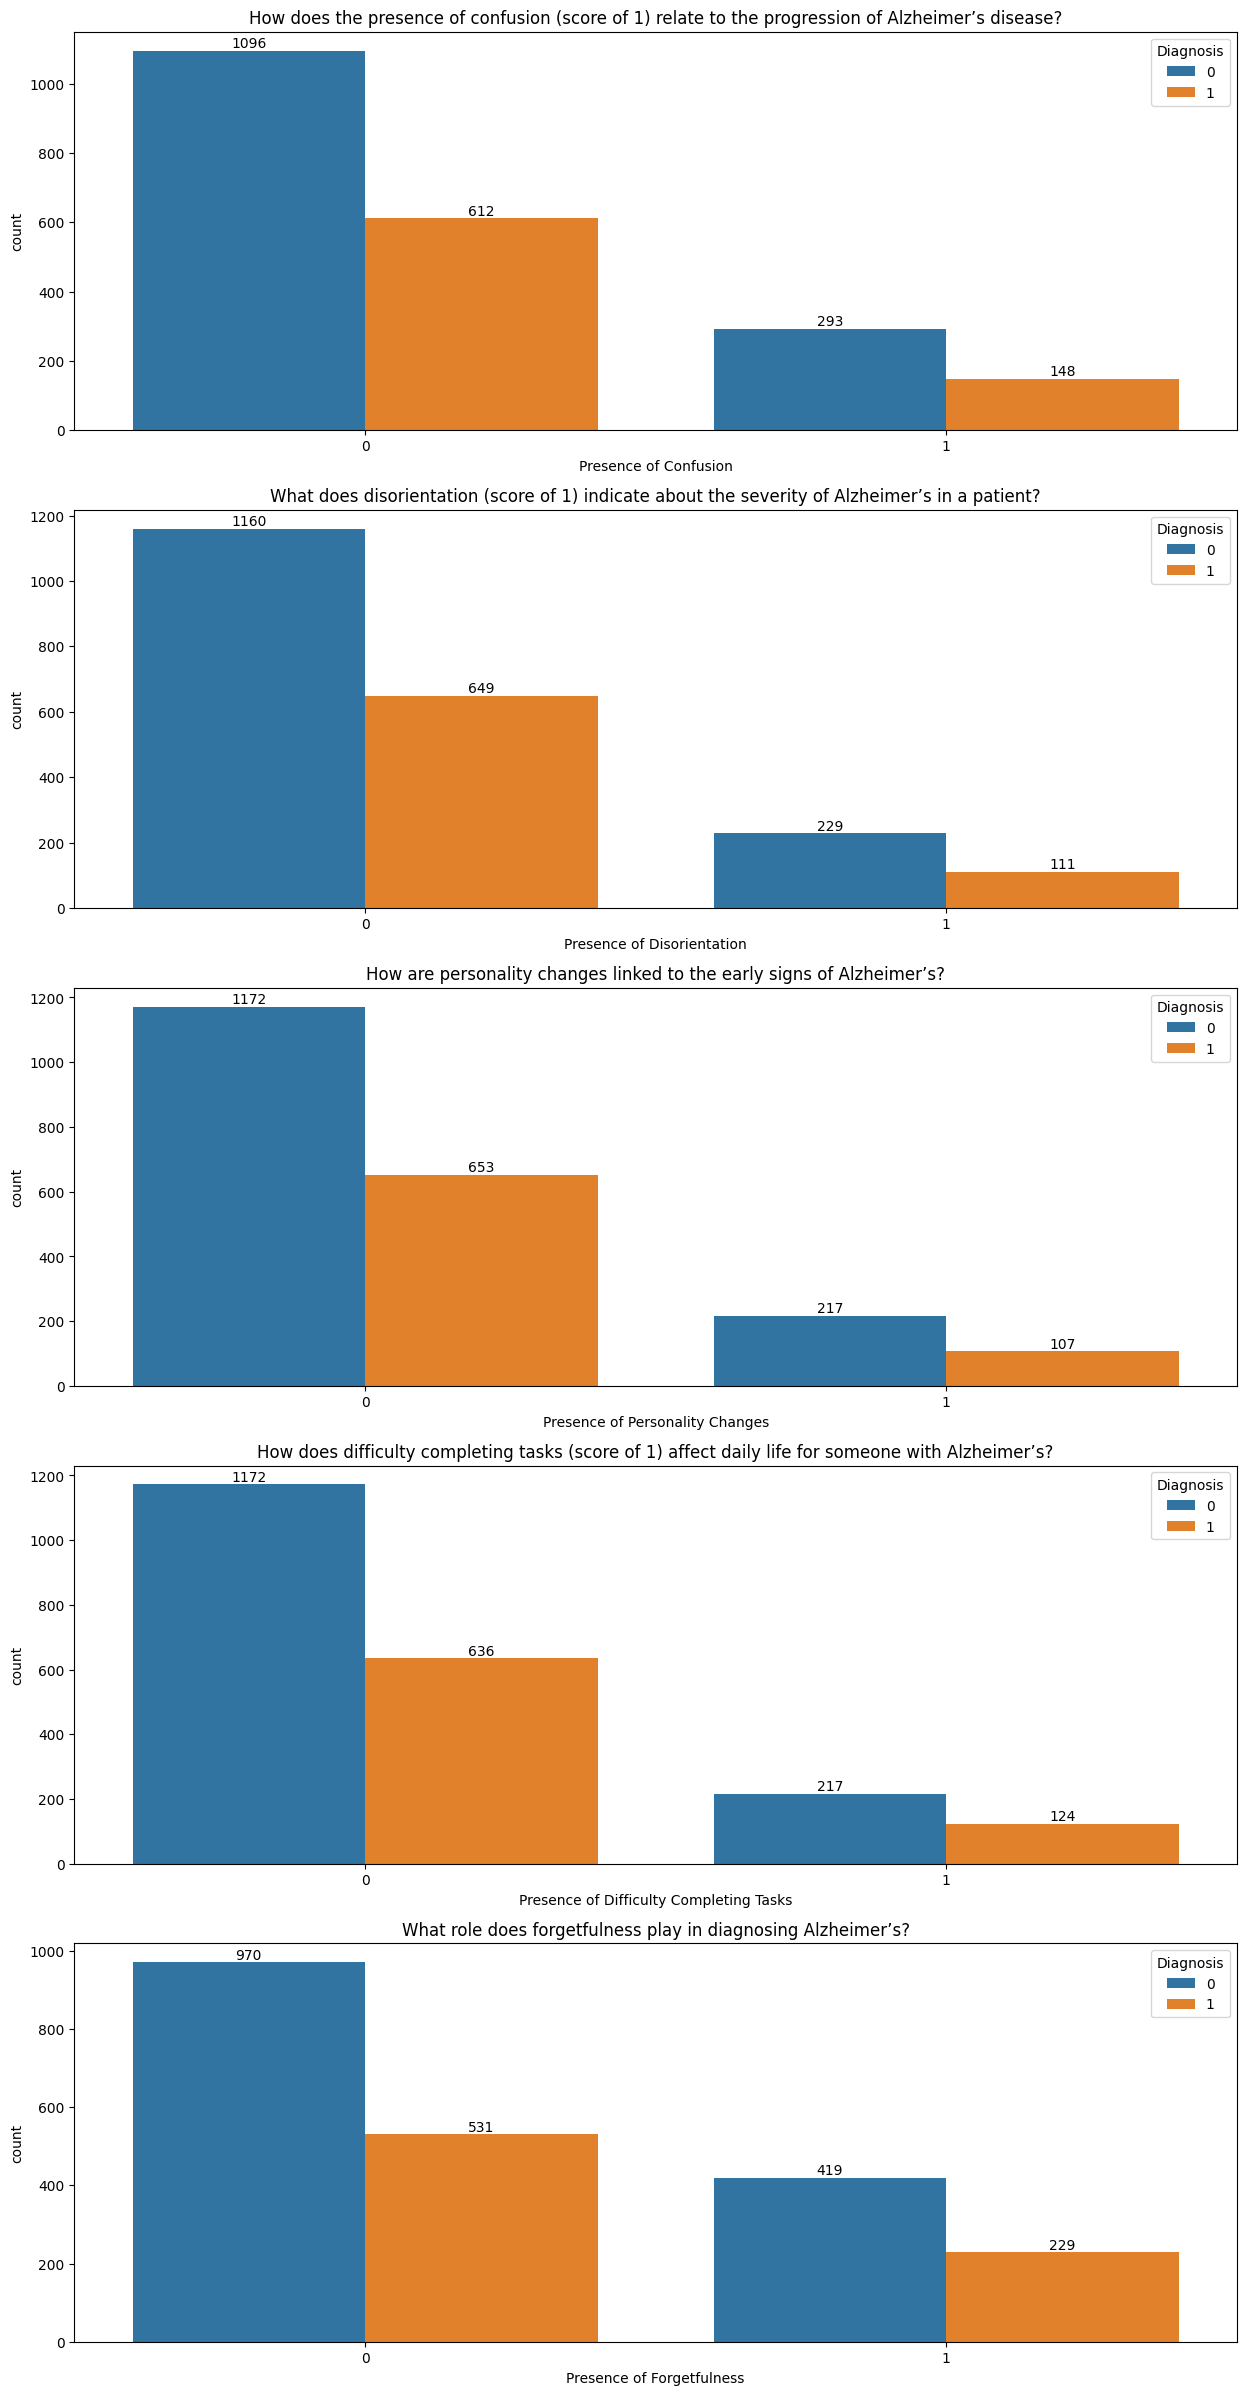

In [17]:
# Setting figure
fig, axes = plt.subplots(5, 1, figsize = (15, 30))

# List of tuples containing column names, x-labels, and titles
plots_info = [
    ("Confusion", "Presence of Confusion", "How does the presence of confusion (score of 1) relate to the progression of Alzheimer’s disease?"),
    ("Disorientation", "Presence of Disorientation", "What does disorientation (score of 1) indicate about the severity of Alzheimer’s in a patient?"),
    ("PersonalityChanges", "Presence of Personality Changes", "How are personality changes linked to the early signs of Alzheimer’s?"),
    ("DifficultyCompletingTasks", "Presence of Difficulty Completing Tasks", "How does difficulty completing tasks (score of 1) affect daily life for someone with Alzheimer’s?"),
    ("Forgetfulness", "Presence of Forgetfulness", "What role does forgetfulness play in diagnosing Alzheimer’s?")
]

# Loop to create plots
for ax, (column, xlabel, title) in zip(axes, plots_info):
    sns.countplot(data = df, x = column, hue = "Diagnosis", ax = ax)
    add_labels(ax)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

🩺 Diagnostic
Sur 2 149 diagnostics, il existe un déséquilibre entre les deux classes - "Oui" et "Non". La majorité, représentant 64,6 % des patients, ne sont pas diagnostiqués avec Alzheimer, tandis que le pourcentage restant correspond à ceux qui sont diagnostiqués.

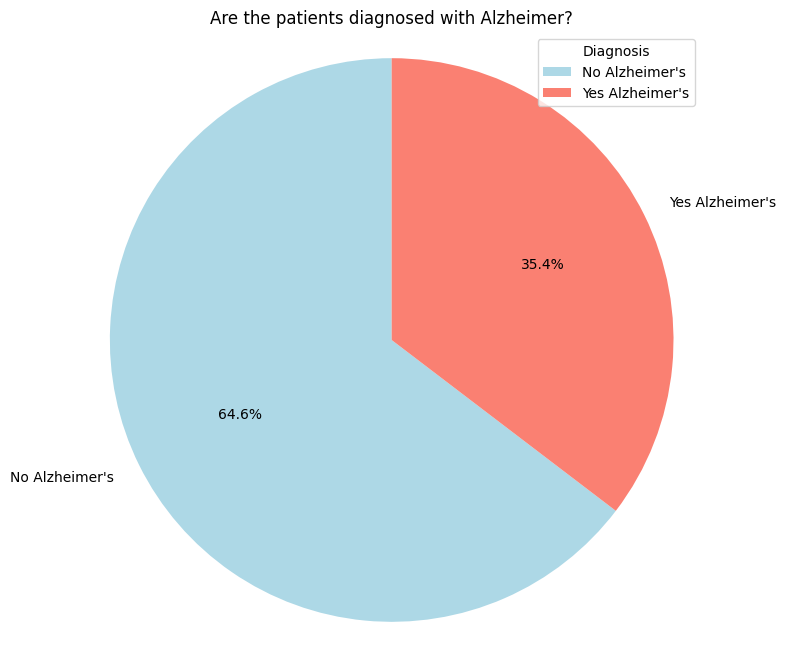

In [18]:
# Compter les occurrences des valeurs dans la colonne "Diagnosis"
diagnosis_counts = df['Diagnosis'].value_counts()

# Créer un pie chart avec des labels plus explicites
plt.figure(figsize=(8, 8))
pie_chart = plt.pie(diagnosis_counts, 
                    labels=["No Alzheimer's", "Yes Alzheimer's"], 
                    autopct='%1.1f%%', 
                    startangle=90, 
                    colors=['lightblue', 'salmon'])

# Ajouter une légende
plt.legend(["No Alzheimer's", "Yes Alzheimer's"], title="Diagnosis", loc="upper right")

# Afficher le titre et la légende
plt.title("Are the patients diagnosed with Alzheimer?")
plt.axis('equal')  
plt.show()

**🧹 Prétraitement des Données**

In [20]:
# Function to reverse mapping
def reverse_mapping(mapping_dict):
    return {v: k for k, v in mapping_dict.items()}

In [45]:
# Reverse mapping on binary columns
reverse_binary_mapping = reverse_mapping(mapping_binary_columns)
df[binary_columns] = df[binary_columns].replace(reverse_binary_mapping)

# Reverse mapping on "Gender" column
reversed_gender_mapping = reverse_mapping(mapping_gender)
df["Gender"] = df["Gender"].replace(reversed_gender_mapping)

# Reverse mapping on "Ethnicity" column
reverse_ethnicity_mapping = reverse_mapping(mapping_ethnicity)
df["Ethnicity"] = df["Ethnicity"].replace(reverse_ethnicity_mapping)

# Reverse mapping on "EducationLevel" column
reverse_educationlevel_mapping = reverse_mapping(mapping_educationlevel)
df["EducationLevel"] = df["EducationLevel"].replace(reverse_educationlevel_mapping)

🌡️ Analyse de la Carte Thermique
L'analyse de la carte thermique montre que les caractéristiques des évaluations cognitives et fonctionnelles, telles que le MMSE, l'évaluation fonctionnelle, les plaintes de mémoire, les problèmes comportementaux et le score ADL, sont fortement corrélées. Aucune corrélation significative n'est observée entre les autres caractéristiques.

Il est important d'identifier ces corrélations, car lorsque deux caractéristiques sont fortement corrélées, elles fournissent essentiellement la même information, ce qui peut compliquer le modèle. En supprimant l'une d'elles, on peut simplifier le modèle tout en conservant son intégrité et sa précision.

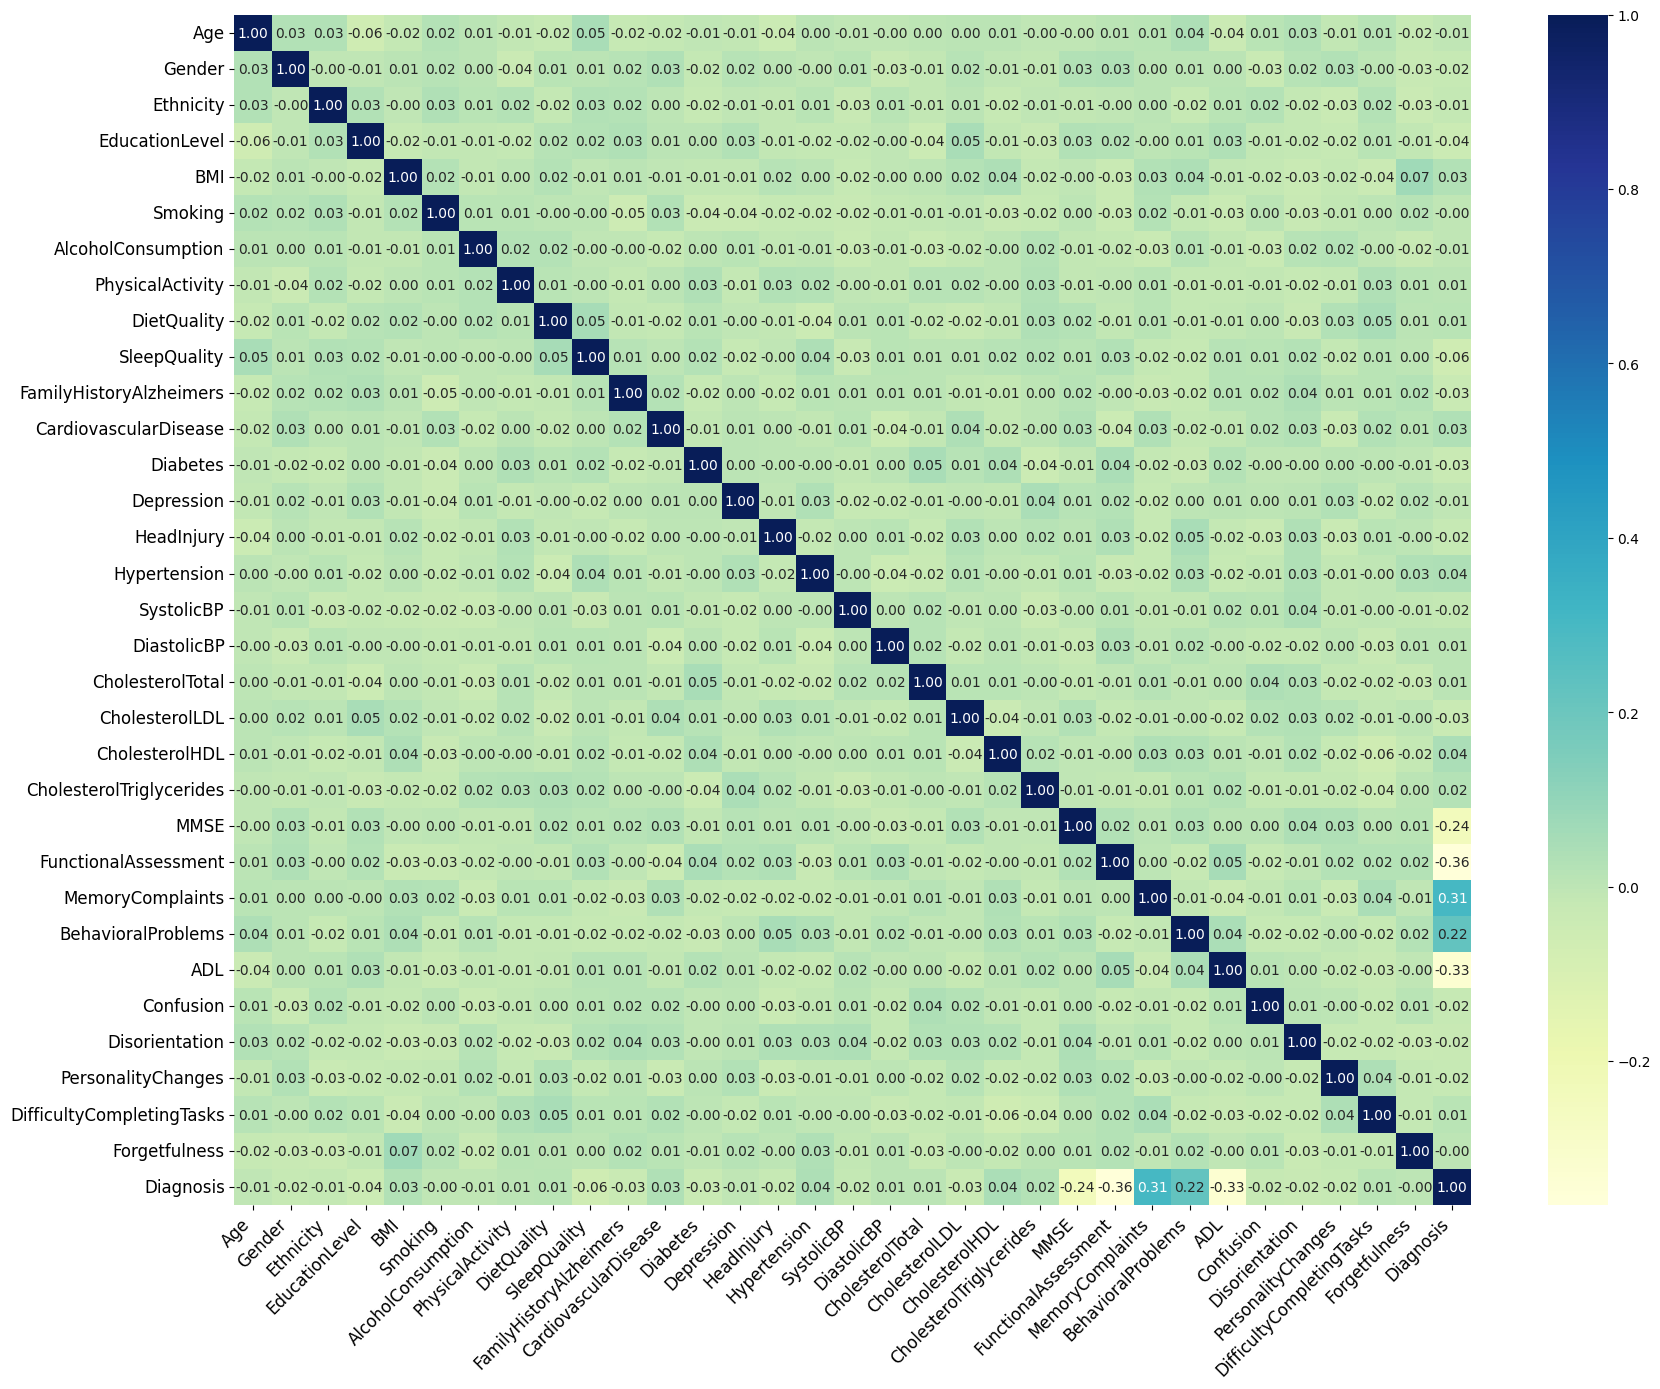

In [46]:
# Heat map analysis
plt.figure(figsize = (18, 14))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True, fmt=".2f")
plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

In [47]:
# Extract and sort correlations by absolute value
correlations = df.corr()["Diagnosis"].abs().sort_values(ascending = False)
print(correlations)

Diagnosis                    1.000000
FunctionalAssessment         0.364898
ADL                          0.332346
MemoryComplaints             0.306742
MMSE                         0.237126
BehavioralProblems           0.224350
SleepQuality                 0.056548
EducationLevel               0.043966
CholesterolHDL               0.042584
Hypertension                 0.035080
FamilyHistoryAlzheimers      0.032900
CholesterolLDL               0.031976
Diabetes                     0.031508
CardiovascularDisease        0.031490
BMI                          0.026343
Disorientation               0.024648
CholesterolTriglycerides     0.022672
HeadInjury                   0.021411
Gender                       0.020975
PersonalityChanges           0.020627
Confusion                    0.019186
SystolicBP                   0.015615
Ethnicity                    0.014782
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
AlcoholConsumption           0.007618
CholesterolT

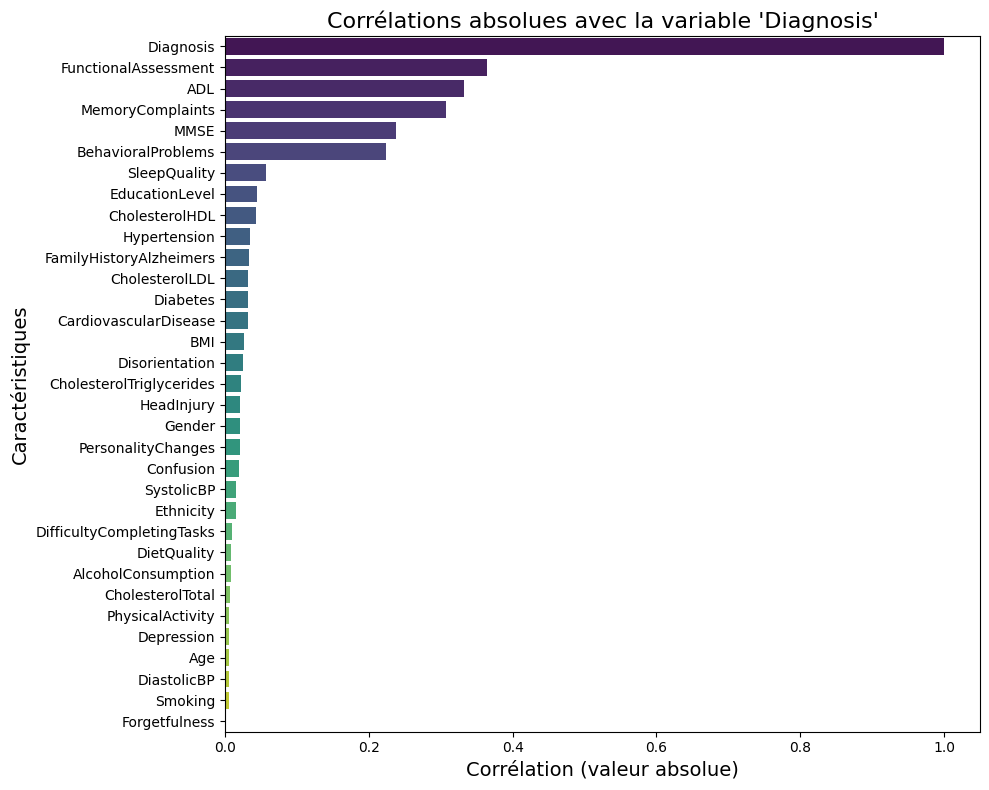

In [48]:
# Conversion en DataFrame pour faciliter la manipulation
correlations_df = pd.DataFrame(list(correlations.items()), columns=["Feature", "Correlation"])

# Trier les corrélations par ordre décroissant
correlations_df = correlations_df.sort_values(by="Correlation", ascending=False)

# Créer le graphique
plt.figure(figsize=(10, 8))
sns.barplot(
    data=correlations_df,
    x="Correlation",
    y="Feature",
    palette="viridis"
)

# Ajouter un titre et des labels
plt.title("Corrélations absolues avec la variable 'Diagnosis'", fontsize=16)
plt.xlabel("Corrélation (valeur absolue)", fontsize=14)
plt.ylabel("Caractéristiques", fontsize=14)

# Afficher le graphique
plt.tight_layout()
plt.show()


# **Supprimer les outlayer**


In [23]:
# Supprimer la colonne 'DoctorInCharge' du DataFrame
df = df.drop(columns=['DiastolicBP','PhysicalActivity','DietQuality','Ethnicity','SystolicBP','HeadInjury','CholesterolLDL','CholesterolHDL','CholesterolTriglycerides',])

# **Préparation des données**

In [24]:

# Définir les features (X) et la cible (y)
X = df.drop(columns=['Diagnosis'])  # Toutes les colonnes sauf "Diagnosis"
y = df['Diagnosis']  # Colonne cible


In [25]:
# Normalisation ou encodage si nécessaire (exemple simple : one-hot encoding)
X = pd.get_dummies(X, drop_first=True)  # Encodage des variables catégoriques


In [26]:
# Étape 2 : Division des données en ensembles d'entraînement, validation et test
# Division initiale en 85% train+valid et 15% test
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Division des 85% restants en 70% train et 15% valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.1765, random_state=42, stratify=y_train_valid)

# Vérification des dimensions
print(f"Train size: {X_train.shape}, Validation size: {X_valid.shape}, Test size: {X_test.shape}")


Train size: (1503, 24), Validation size: (323, 24), Test size: (323, 24)


In [33]:
# Étape 3 : Entraînement du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42 ,class_weight='balanced')  # Modèle avec 100 arbres
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       209
           1       0.94      0.93      0.93       114

    accuracy                           0.95       323
   macro avg       0.95      0.95      0.95       323
weighted avg       0.95      0.95      0.95       323

AUC Score: 0.98


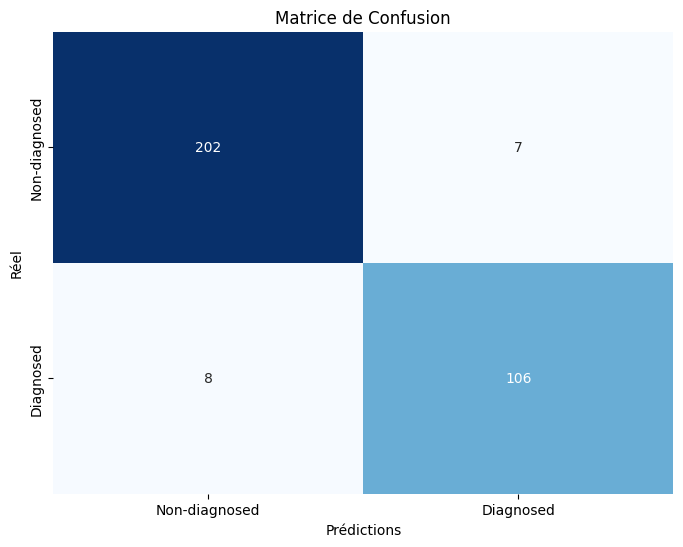

In [34]:
# Étape 5 : Évaluation sur l'ensemble de test
y_test_pred = rf_model.predict(X_test)
y_test_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Afficher les métriques
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Score AUC
auc_score = roc_auc_score(y_test, y_test_proba)
print(f"AUC Score: {auc_score:.2f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Afficher la matrice de confusion sous forme colorée et annotée
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-diagnosed', 'Diagnosed'],
            yticklabels=['Non-diagnosed', 'Diagnosed'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()

# **Arbre de décision** 

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       209
           1       0.88      0.94      0.91       114

    accuracy                           0.93       323
   macro avg       0.92      0.94      0.93       323
weighted avg       0.94      0.93      0.94       323

AUC Score: 0.94
Confusion Matrix:
[[195  14]
 [  7 107]]


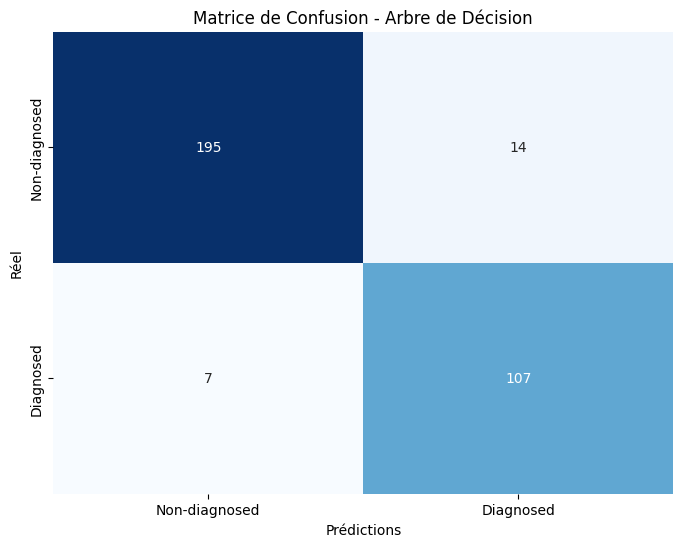

In [35]:


# Étape 2 : Création et entraînement du modèle Arbre de Décision
dt_model = DecisionTreeClassifier(random_state=42 ,class_weight='balanced')
dt_model.fit(X_train, y_train)

# Étape 3 : Prédiction sur l'ensemble de test
y_test_pred = dt_model.predict(X_test)
y_test_proba = dt_model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Affichage des métriques de performance
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Score AUC
auc_score = roc_auc_score(y_test, y_test_proba)
print(f"AUC Score: {auc_score:.2f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Afficher la matrice de confusion sous forme colorée et annotée
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-diagnosed', 'Diagnosed'],
            yticklabels=['Non-diagnosed', 'Diagnosed'])
plt.title('Matrice de Confusion - Arbre de Décision')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()

# **Sauvegarder le model random forest**

In [36]:
# Sauvegarder le modèle
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']